# Contents:
* [1. Import Libraries & Data](#import-libraries)
* [2. Explorotary Data Analysis (EDA)](#eda)
* [3. Data Preprocessing](#data-preprocessing)
* [4. Models Experiments](#models)

<a id="import-libraries"></a>
# 1. Import Libraries & Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models 
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('../data/processed/descriptors.csv')

In [4]:
data.head(2)

,Compound,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,p-Nitrophenol; 4-nitrophenol,-2.2500,1.6800,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,...,3.4083,2.2857,6.0000,373.7775,409.0118,503.2559,390.5658,173.6033,10.0000,8.5199
1,Benzyl bromide,-1.8920,2.1200,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,...,3.1111,1.8000,6.0000,463.1751,476.6529,530.3165,392.2806,151.9746,8.0000,8.3385


In [5]:
# getting all descriptors except compound name
without_compound = data.iloc[:, 1:]
without_compound.head(2)

,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,WPATH,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
0,-2.2500,1.6800,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,120.0000,...,3.4083,2.2857,6.0000,373.7775,409.0118,503.2559,390.5658,173.6033,10.0000,8.5199
1,-1.8920,2.1200,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,64.0000,...,3.1111,1.8000,6.0000,463.1751,476.6529,530.3165,392.2806,151.9746,8.0000,8.3385


In [6]:
without_compound.shape

(446, 169)

In [7]:
# no missing values
without_compound.isna().sum().sum()

0

Our dependant variable is `logkpl`.

<a id="eda"></a>
# 2. EDA 

In [8]:
without_compound['logkpl'].describe()

count   446.0000
mean     -2.6252
std       1.1353
min      -5.5272
25%      -3.4012
50%      -2.3885
75%      -1.7521
max      -0.0809
Name: logkpl, dtype: float64

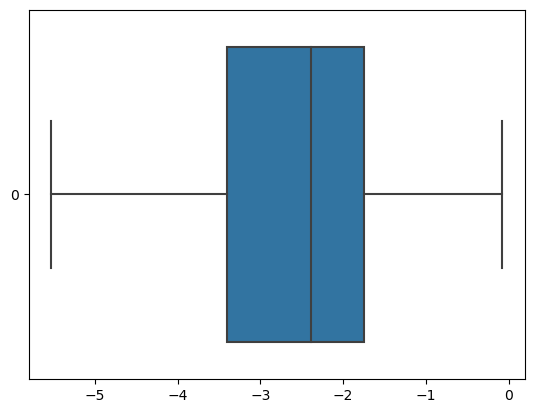

In [9]:
sns.boxplot(without_compound['logkpl'], orient='h')
plt.show();

In [10]:
data.describe()

,logkpl,MLogP,nSmallRings,nAromRings,nRingBlocks,nAromBlocks,nRings3,nRings5,nRings6,WPATH,...,Kier2,Kier3,naAromAtom,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,MolIP
count,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,...,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000,446.0000
mean,-2.6252,2.4409,1.9619,0.6121,0.8744,0.5583,0.0022,0.3969,1.5628,591.7556,...,5.2440,3.2016,3.1278,1061.8556,1275.8846,1902.3893,1971.4716,1591.0055,16.4798,7.3984
std,1.1353,0.7323,1.6106,0.6498,0.5425,0.5528,0.0474,0.4989,1.1686,636.5846,...,2.3855,2.3479,3.5174,802.2311,1042.4677,1744.6136,1974.1682,1732.0442,8.8973,4.0356
min,-5.5272,1.2400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,...,0.0000,0.0000,0.0000,16.7675,8.3089,0.0000,0.0000,0.0000,1.0000,-41.3311
25%,-3.4012,1.9000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,88.0000,...,3.4083,1.9263,0.0000,387.3929,404.5928,452.7757,361.4305,164.4027,9.0000,7.3744
50%,-2.3885,2.2850,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,274.0000,...,4.8409,2.5877,0.0000,635.1142,708.7714,935.1831,810.7679,511.2593,13.0000,8.2118
75%,-1.7521,3.2200,4.0000,1.0000,1.0000,1.0000,0.0000,1.0000,3.0000,1052.0000,...,6.2696,3.5156,6.0000,1895.8131,2378.5274,3688.5459,3867.5736,3018.4805,24.0000,8.5594
max,-0.0809,3.7700,6.0000,3.0000,3.0000,2.0000,1.0000,2.0000,4.0000,3832.0000,...,17.0526,19.0588,16.0000,2982.3063,3787.0264,6247.8986,7539.1312,6991.7840,37.0000,10.1660


In [10]:
# for col in data.columns:
#     if col == "set":
#         continue
#     else:
#         sns.boxplot(x=data[col])
#         plt.show();

In [11]:
# for col in data.columns:
#     # excluding these columns
#     if col == "set" or col == "logkpl" or col == "logJmaxm":
#         continue
    
#     #plt.figure(figsize=(20, 8))
#     ax = sns.lmplot(data=data, x='logJmaxm', y=col)
#     plt.title("logJmaxm Vs. {}".format(col))
#     plt.show();

In [11]:
# plt.figure(figsize=(10, 6))
# sns.heatmap(without_compound.corr(), annot=True);

<a id="data-preprocessing"></a>
# 3. Data Preprocessing

In [12]:
model_data = without_compound.copy()

In [13]:
X = model_data.drop(["logkpl"], axis=1)
y = model_data['logkpl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (334, 168) 	 Shape of y_train: (334,)
Shape of X_test: (112, 168) 	 Shape of y_test: (112,)


<a id="models"></a>
# 4. Models Experiments

In [83]:
def evaluate_model(model_df, i, model_name, model, X, y, X_test, y_test):
    """
    this function is for regression takes the model with the data and calculate
    the scores, with cross validation techniques, in addition to MAE, MSE, RMSE, MAPE
    R Squared and Adjusted R Squared

    :param model: model
    :param X_train, X_test, y_train, y_test: data that was used
    """

    # cross validation with 5 folds
    all_cv_5 = cross_val_score(model, X, y, cv=5, scoring="r2")
    print("all CV 5: {}".format(all_cv_5))
    # print("Mean Cross-Validation score: {}".format(all_cv_5.mean()))

    # predictions from our model
    predictions = model.predict(X_test)


    # calculating R squared and Adjusted R squared
    r_sqre = r2_score(y_test, predictions)
    n = len(y_test)
    p = X_test.shape[1] # number of independant features

    Adj_r2 = 1 - ((1 - r_sqre) * (n - 1) / (n - 1 - p))
    
    test_mae = mean_absolute_error(y_test, predictions)

    test_mse = mean_squared_error(y_test, predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

    


    print("=" * 40)
    model_df.loc[i] = [model_name, all_cv_5.mean(),
                    test_mae, mean_absolute_percentage_error(y_test, predictions),
                   test_mse, test_rmse, r_sqre, Adj_r2]

    return model_df

In [85]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr = Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])

pipeline_eln = Pipeline([("scalar8", StandardScaler()),
                     ("eln", ElasticNet())])

pipeline_br = Pipeline([("scalar10", StandardScaler()),
                     ("br", BayesianRidge())])

pipeline_cat = Pipeline([("scalar11", StandardScaler()),
                     ("cat", CatBoostRegressor(allow_writing_files=False, verbose=0))])

pipeline_lgbm = Pipeline([("scalar12", StandardScaler()),
                     ("lgbm", LGBMRegressor())])



# List of all the pipelines
pipelines = [pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr,
            pipeline_eln, pipeline_br, pipeline_cat, pipeline_lgbm] # 

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "Lasso", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor", 5: "GradientBoostingRegressor",
                6: "Elastic Net", 7:"BayesianRidge", 8: "CatBoostRegressor", 9: "LGBMRegressor"}
    #, 

models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE",
                                         "MAPE", "MSE", "RMSE", "R_Squared", "Adjusted_R_Squared"])


# Fit the pipelines and display the scores with Cross validation
for i, pipe in enumerate(pipelines):
    # getting the name of our model
    model_name = pipeline_dict[i]
    print(model_name)
    
    # fitting our data
    pipe.fit(X_train, y_train)
    
    evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_test, y_test)

Lasso
all CV 5: [-0.81963771 -0.01153815 -0.75995244 -0.08257966 -0.10484652]
DecisionTree
all CV 5: [-0.26665684  0.48022524  0.5421105   0.31965259  0.46451577]
RandomForest
all CV 5: [0.40337465 0.51541283 0.39254584 0.5125915  0.77436493]
KNeighbors
all CV 5: [ 0.50709336  0.2753641  -0.65305324 -0.017859    0.67117349]
XGBRegressor
all CV 5: [0.41496513 0.54132132 0.24017609 0.39754819 0.73323105]
GradientBoostingRegressor
all CV 5: [0.40651565 0.5185808  0.56861481 0.51816791 0.73933893]
Elastic Net
all CV 5: [-0.62433667  0.1134655  -0.57876155  0.24131705  0.06791585]
BayesianRidge
all CV 5: [ 0.198624    0.17515757  0.3955849  -0.08435315  0.53257089]
CatBoostRegressor
all CV 5: [0.50298672 0.53359039 0.45786051 0.50460627 0.70999299]
LGBMRegressor
all CV 5: [0.4208776  0.513767   0.32610431 0.42574016 0.76079997]


In [86]:
models_scores_df

,model,Mean CV,MAE,MAPE,MSE,RMSE,R_Squared,Adjusted_R_Squared
0,Lasso,-0.3557,0.8715,0.3956,1.1631,1.0784,-0.0014,-0.1579
1,DecisionTree,0.3080,0.4955,0.2367,0.5739,0.7576,0.5059,0.4286
2,RandomForest,0.5197,0.4457,0.2026,0.4332,0.6582,0.6270,0.5687
3,KNeighbors,0.1565,0.4981,0.2221,0.5188,0.7203,0.5533,0.4835
4,XGBRegressor,0.4654,0.4777,0.2114,0.4736,0.6882,0.5922,0.5285
5,GradientBoostingRegressor,0.5502,0.4424,0.1922,0.4211,0.6490,0.6374,0.5807
6,Elastic Net,-0.1561,0.8190,0.3728,1.0135,1.0067,0.1273,-0.0090
7,BayesianRidge,0.2435,0.5721,0.2560,0.5444,0.7378,0.5313,0.4580
8,CatBoostRegressor,0.5418,0.4560,0.2005,0.4404,0.6636,0.6208,0.5616
9,LGBMRegressor,0.4895,0.4392,0.1973,0.3942,0.6279,0.6605,0.6075


In [87]:
import statsmodels.api as sm
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [88]:
calc_vif(X)

,variables,VIF
0,MLogP,inf
1,nSmallRings,inf
2,nAromRings,inf
3,nRingBlocks,inf
4,nAromBlocks,inf
...,...,...
163,ATSp3,inf
164,ATSp4,inf
165,ATSp5,inf
166,nB,inf


Infinity means there are many correlations, so we have to limit the features, in short eliminate multicollinearity

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(XGBRegressor(), 
           k_features=15,
           forward=True, 
           floating=False, 
           verbose=2,
           scoring="r2",
           cv=5)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   42.5s finished

[2023-03-11 16:16:11] Features: 1/15 -- score: 0.14919564052011314[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 167 out of 167 | elapsed:   42.7s finished

[2023-03-11 16:16:54] Features: 2/15 -- score: 0.3001964067399726[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 166 out of 166 | elapsed:   46.4s finished

[2023-03-11 16:17:40] Features: 3/15 -- score: 0.48874074816318397[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [90]:
# try selecting more features
sfs1.k_feature_names_

('nAromRings',
 'MDEO-11',
 'MDEN-11',
 'MDEN-22',
 'ALogp2',
 'khs.dsCH',
 'khs.tsC',
 'khs.aasC',
 'khs.tN',
 'khs.aasN',
 'khs.sOH',
 'khs.sF',
 'TopoPSA',
 'ATSc2',
 'C1SP1')

In [91]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(31,)","[-0.2516396273369701, 0.27393766671733033, 0.1...",0.1492,"(MDEO-11,)",0.2780,0.2163,0.1082
2,"(31, 119)","[0.12367388563522452, 0.34387498727541654, 0.3...",0.3002,"(MDEO-11, TopoPSA)",0.1356,0.1055,0.0528
3,"(31, 41, 119)","[0.30880431201754954, 0.5093647084967751, 0.43...",0.4887,"(MDEO-11, ALogp2, TopoPSA)",0.1453,0.1131,0.0565
4,"(31, 41, 64, 119)","[0.3149384870253681, 0.47418749809880567, 0.40...",0.4970,"(MDEO-11, ALogp2, khs.sOH, TopoPSA)",0.1761,0.1370,0.0685
5,"(31, 41, 64, 119, 121)","[0.30818013989611237, 0.5307275287329458, 0.49...",0.5188,"(MDEO-11, ALogp2, khs.sOH, TopoPSA, ATSc2)",0.1543,0.1201,0.0600
6,"(31, 41, 64, 68, 119, 121)","[0.38631190602867793, 0.4785935808345101, 0.55...",0.5437,"(MDEO-11, ALogp2, khs.sOH, khs.sF, TopoPSA, AT...",0.1300,0.1012,0.0506
7,"(31, 41, 46, 64, 68, 119, 121)","[0.4276249733519527, 0.5411332487952963, 0.554...",0.5688,"(MDEO-11, ALogp2, khs.dsCH, khs.sOH, khs.sF, T...",0.1134,0.0882,0.0441
8,"(31, 37, 41, 46, 64, 68, 119, 121)","[0.4222975291895883, 0.5559418995125798, 0.554...",0.5725,"(MDEO-11, MDEN-22, ALogp2, khs.dsCH, khs.sOH, ...",0.1161,0.0903,0.0452
9,"(31, 37, 41, 46, 50, 64, 68, 119, 121)","[0.4222975291895883, 0.5559418995125798, 0.554...",0.5728,"(MDEO-11, MDEN-22, ALogp2, khs.dsCH, khs.tsC, ...",0.1166,0.0907,0.0454
10,"(31, 37, 41, 46, 50, 58, 64, 68, 119, 121)","[0.4222975291895883, 0.5559418995125798, 0.554...",0.5728,"(MDEO-11, MDEN-22, ALogp2, khs.dsCH, khs.tsC, ...",0.1166,0.0907,0.0454


In [92]:
selected_features_X = X.iloc[:, list(sfs1.k_feature_idx_)]
y = model_data['logkpl']

X_train, X_test, y_train, y_test = train_test_split(selected_features_X, y, test_size=0.25)

print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (334, 15) 	 Shape of y_train: (334,)
Shape of X_test: (112, 15) 	 Shape of y_test: (112,)


In [96]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr = Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])

pipeline_eln = Pipeline([("scalar8", StandardScaler()),
                     ("eln", ElasticNet())])

pipeline_br = Pipeline([("scalar10", StandardScaler()),
                     ("br", BayesianRidge())])

pipeline_cat = Pipeline([("scalar11", StandardScaler()),
                     ("cat", CatBoostRegressor(allow_writing_files=False, verbose=0))])

pipeline_lgbm = Pipeline([("scalar12", StandardScaler()),
                     ("lgbm", LGBMRegressor())])



# List of all the pipelines
pipelines = [pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr,
            pipeline_eln, pipeline_br, pipeline_cat, pipeline_lgbm] # 

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "Lasso", 1: "DecisionTree", 2: "RandomForest", 3: "KNeighbors", 4: "XGBRegressor", 5: "GradientBoostingRegressor",
                6: "Elastic Net", 7:"BayesianRidge", 8: "CatBoostRegressor", 9: "LGBMRegressor"}
    #, 

models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE",
                                         "MAPE", "MSE", "RMSE", "R_Squared", "Adjusted_R_Squared"])



# Fit the pipelines and display the scores with Cross validation
for i, pipe in enumerate(pipelines):
    # getting the name of our model
    model_name = pipeline_dict[i]
    print(model_name)
    
    # fitting our data
    pipe.fit(X_train, y_train)
    
    evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_test, y_test)

Lasso
all CV 5: [-0.81963771 -0.01153815 -0.75995244 -0.08257966 -0.10484652]
DecisionTree
all CV 5: [0.02198035 0.51207795 0.54119389 0.25100519 0.58854763]
RandomForest
all CV 5: [0.41732027 0.50547696 0.38600842 0.50690816 0.78619444]
KNeighbors
all CV 5: [ 0.50709336  0.2753641  -0.65305324 -0.017859    0.67117349]
XGBRegressor
all CV 5: [0.41496513 0.54132132 0.24017609 0.39754819 0.73323105]
GradientBoostingRegressor
all CV 5: [0.38248739 0.51681797 0.57054046 0.50283118 0.74742101]
Elastic Net
all CV 5: [-0.62433667  0.1134655  -0.57876155  0.24131705  0.06791585]
BayesianRidge
all CV 5: [ 0.198624    0.17515757  0.3955849  -0.08435315  0.53257089]
CatBoostRegressor
all CV 5: [0.50298672 0.53359039 0.45786051 0.50460627 0.70999299]
LGBMRegressor
all CV 5: [0.4208776  0.513767   0.32610431 0.42574016 0.76079997]


In [97]:
models_scores_df

,model,Mean CV,MAE,MAPE,MSE,RMSE,R_Squared,Adjusted_R_Squared
0,Lasso,-0.3557,0.9262,0.7017,1.2720,1.1278,-0.0023,-0.1589
1,DecisionTree,0.3830,0.4119,0.3495,0.4157,0.6447,0.6724,0.6213
2,RandomForest,0.5204,0.4307,0.3222,0.3871,0.6222,0.6950,0.6473
3,KNeighbors,0.1565,0.4850,0.3598,0.4710,0.6863,0.6289,0.5709
4,XGBRegressor,0.4654,0.4276,0.3311,0.4062,0.6373,0.6799,0.6299
5,GradientBoostingRegressor,0.5440,0.4024,0.2770,0.3572,0.5977,0.7185,0.6745
6,Elastic Net,-0.1561,0.8749,0.6599,1.1595,1.0768,0.0864,-0.0564
7,BayesianRidge,0.2435,0.6407,0.4635,0.6987,0.8359,0.4495,0.3634
8,CatBoostRegressor,0.5418,0.3993,0.2910,0.3597,0.5997,0.7166,0.6723
9,LGBMRegressor,0.4895,0.4357,0.3120,0.3960,0.6293,0.6879,0.6392


In [98]:
calc_vif(selected_features_X)

,variables,VIF
0,nAromRings,5.5366
1,MDEO-11,10.6471
2,MDEN-11,1.3440
3,MDEN-22,2.1528
4,ALogp2,2.5775
5,khs.dsCH,1.8400
6,khs.tsC,inf
7,khs.aasC,5.6595
8,khs.tN,inf
9,khs.aasN,1.7557


## Feature Importance

In [52]:
def plot_feature_importance(model, model_name, slice=20):
    importances = model.feature_importances_
    feature_names = selected_features_X.columns #X.columns

    # Create a pandas DataFrame with the feature importances
    df = pd.DataFrame({"feature": feature_names, "importance": importances})

    # Sort the DataFrame by importance score
    df = df.sort_values("importance", ascending=False).reset_index(drop=True)

    # Create a bar plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.barplot(x="importance", y="feature", data=df[:slice])
    plt.title("Top 20 Feature Importances {}".format(model_name))
    plt.ylabel("Feature Name")
    plt.xlabel("Importance")
    plt.show()

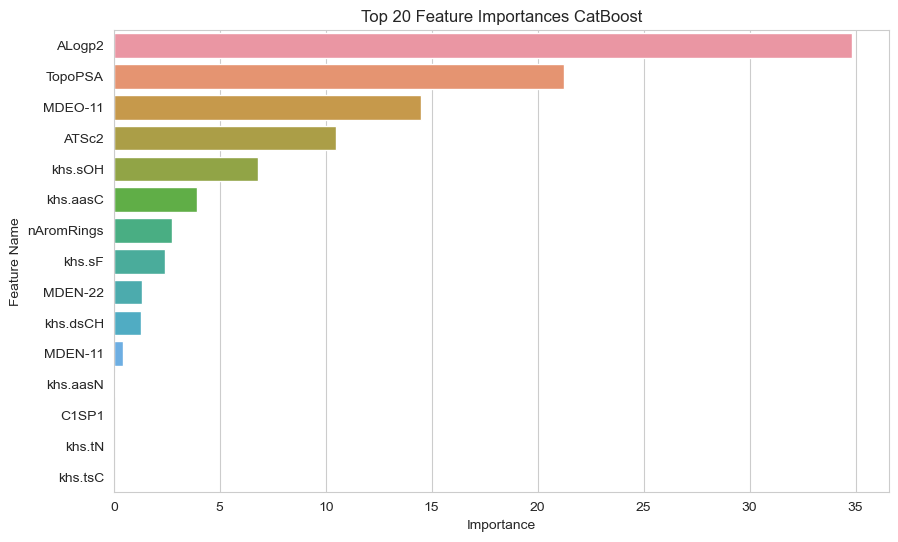

In [82]:
plot_feature_importance(pipeline_cat['cat'], "CatBoost")

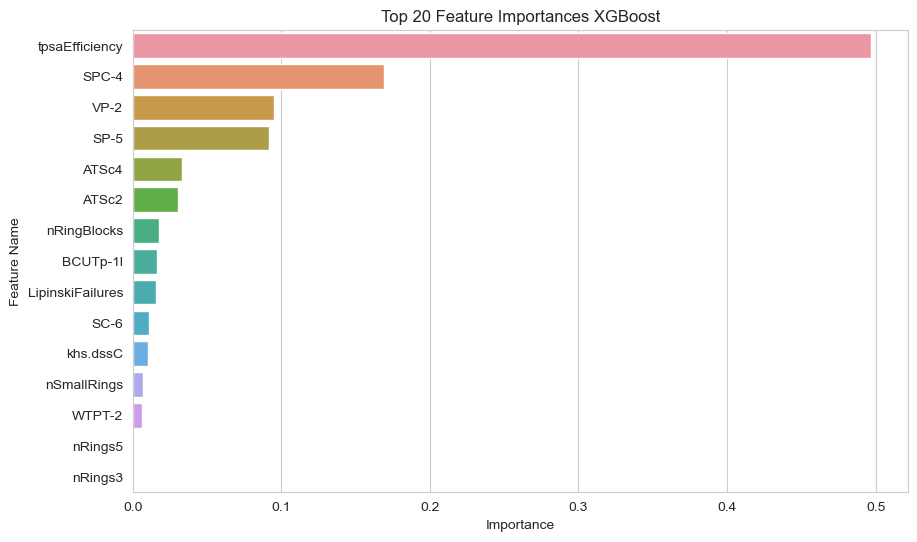

In [70]:
plot_feature_importance(pipeline_xgb['xgb'], "XGBoost")

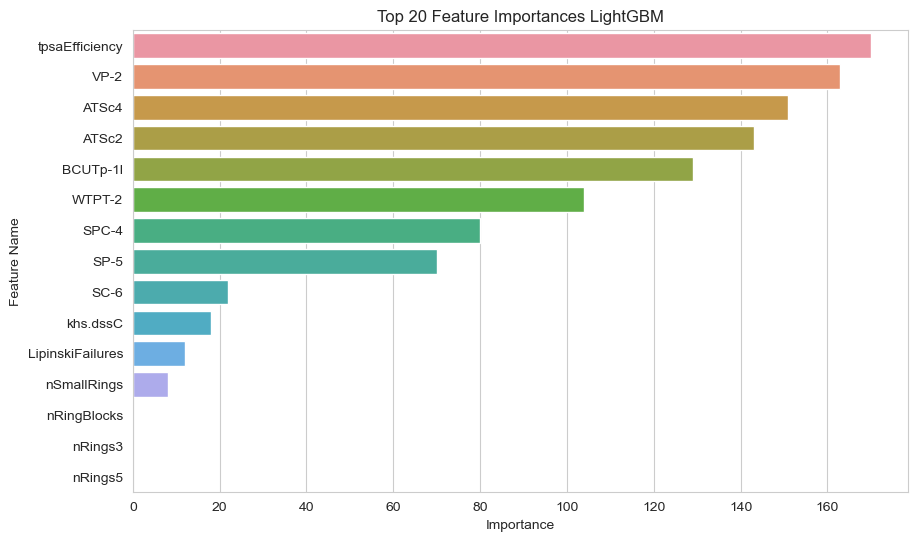

In [71]:
plot_feature_importance(pipeline_lgbm['lgbm'], "LightGBM")

# 5. Hyperparameter Tuning

In [ ]:
GBR = GradientBoostingRegressor()

parameters = {'learning_rate': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
                }

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv=5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=10, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.9164469215865514

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.2}


In [38]:
RFR = RandomForestRegressor()

parameters = {'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10],
                'criterion': ["squared_error", "absolute_error"],
                'max_features': ["auto", "sqrt", "log2"],
            }

grid_RFR = GridSearchCV(estimator=RFR, param_grid=parameters, cv=5, n_jobs=-1)
grid_RFR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt')

 The best score across ALL searched params:
 0.9032530415292959

 The best parameters across ALL searched params:
 {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}


In [40]:
XGB = XGBRegressor()

parameters = {
        'min_child_weight': [1, 5, 10], #50, 100
        'gamma': [0.5, 1, 2], #1.5 5
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 6, 9], # 4, 5, 8, 10
        'learning_rate': [0.001, 0.05, 0.01, 0.15],  # 0.2 0.001
        'n_estimators': [100, 500, 500] # 300 1000
        }

grid_XGB = GridSearchCV(estimator=XGB, param_grid=parameters, cv=5, n_jobs=-1)
grid_XGB.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

 The best score across ALL searched params:
 0.9128726597886478

 The best parameters across ALL searched params:
 {'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 500

In [91]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10, input_shape=[10]))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

In [92]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2)

Epoch 1/300
12/12 - 1s - loss: 17773.7148 - val_loss: 967.4893 - 1s/epoch - 113ms/step
Epoch 2/300
12/12 - 0s - loss: 15201.9404 - val_loss: 795.0051 - 79ms/epoch - 7ms/step
Epoch 3/300
12/12 - 0s - loss: 13639.3438 - val_loss: 714.8043 - 113ms/epoch - 9ms/step
Epoch 4/300
12/12 - 0s - loss: 13535.9883 - val_loss: 666.2584 - 163ms/epoch - 14ms/step
Epoch 5/300
12/12 - 0s - loss: 13137.5293 - val_loss: 665.9255 - 178ms/epoch - 15ms/step
Epoch 6/300
12/12 - 0s - loss: 10572.3633 - val_loss: 546.3154 - 169ms/epoch - 14ms/step
Epoch 7/300
12/12 - 0s - loss: 9552.0088 - val_loss: 557.8103 - 165ms/epoch - 14ms/step
Epoch 8/300
12/12 - 0s - loss: 8885.0586 - val_loss: 495.0725 - 223ms/epoch - 19ms/step
Epoch 9/300
12/12 - 0s - loss: 7787.0366 - val_loss: 428.5459 - 182ms/epoch - 15ms/step
Epoch 10/300
12/12 - 0s - loss: 6508.9658 - val_loss: 398.8904 - 168ms/epoch - 14ms/step
Epoch 11/300
12/12 - 0s - loss: 6482.9097 - val_loss: 367.2913 - 172ms/epoch - 14ms/step
Epoch 12/300
12/12 - 0s - los

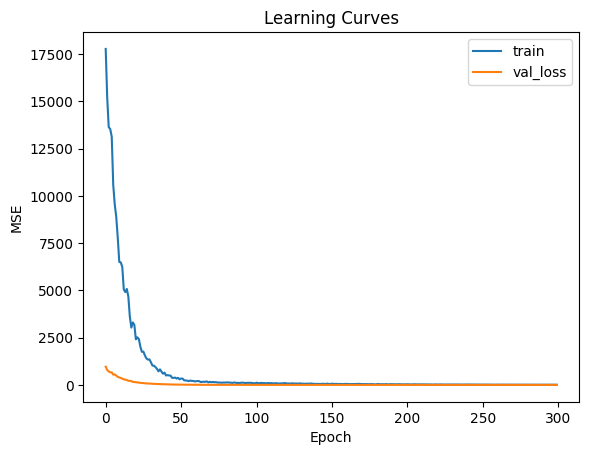

In [94]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [95]:
predictions = model.predict(X_test)

# MAE, MSE, RMSE
print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(mean_squared_error(y_test, predictions)))
print("RMSE: {}\n".format(mean_squared_error(y_test, predictions, squared=False)))

3/3 [==============================] - 0s 6ms/step
MAE: 1.2094342897858261
MSE: 2.7120901040476375
RMSE: 1.6468424648543762



In [22]:
X_train.columns

Index(['MWa', 'logKowb', 'Mptc', 'LogSaqd', 'LogSoce', 'Hdf', 'Hag', 'MVh',
       'Texpi', 'Skin thicknessj'],
      dtype='object')